In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [3]:
# Load the dataset
ds = pd.read_csv(r'D:\Sem - 5\ML- LAB\Assg-5 - Random Forest using DT\Heart_Disease .csv')
df = pd.DataFrame(ds)

# Define X and Y
X = df.drop('Diseased', axis=1)
Y = df['Diseased']

In [4]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['category', 'object']).columns

# Fill missing values in numerical features
X[num_features] = X[num_features].fillna(X[num_features].mean())

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(X[cat_features])

# Convert the encoded categories to a DataFrame
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop the original categorical columns and concatenate encoded ones
X = X.drop(columns=cat_features).reset_index(drop=True)
X = pd.concat([X, encoded_cat_df], axis=1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.20, random_state=42)

clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

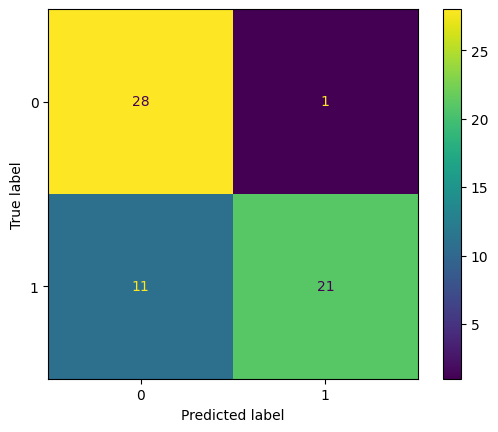

In [6]:
Y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
display.plot()
plt.show()

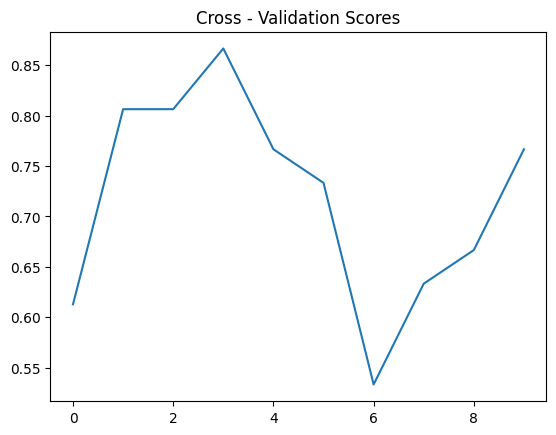

In [7]:
cv_scores = cross_val_score(clf, X, Y, cv = 10)
plt.plot(cv_scores)
plt.title('Cross - Validation Scores')
plt.show()

In [8]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy : {accuracy : .4f}')

Accuracy :  0.8033


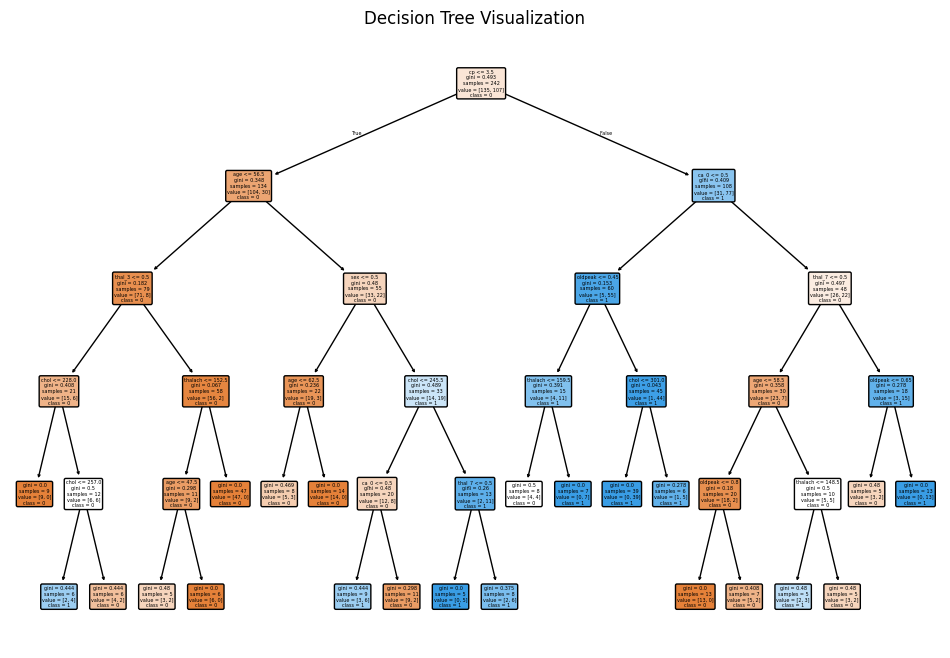

In [9]:
plt.figure(figsize=(12, 8))  # Set figure size
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [11]:
# Build the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rf_clf.predict(X_test)

In [12]:
# 2. Feature importance
feature_importances = rf_clf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Feature Importances:
age: 0.0813
sex: 0.0317
cp: 0.1094
restbp: 0.0778
chol: 0.0707
fbs: 0.0099
restecg: 0.0171
thalach: 0.1080
exang: 0.0435
oldpeak: 0.1060
slope: 0.0589
ca_0: 0.0844
ca_1: 0.0192
ca_2: 0.0181
ca_3: 0.0079
ca_?: 0.0020
thal_3: 0.0778
thal_6: 0.0069
thal_7: 0.0687
thal_?: 0.0009


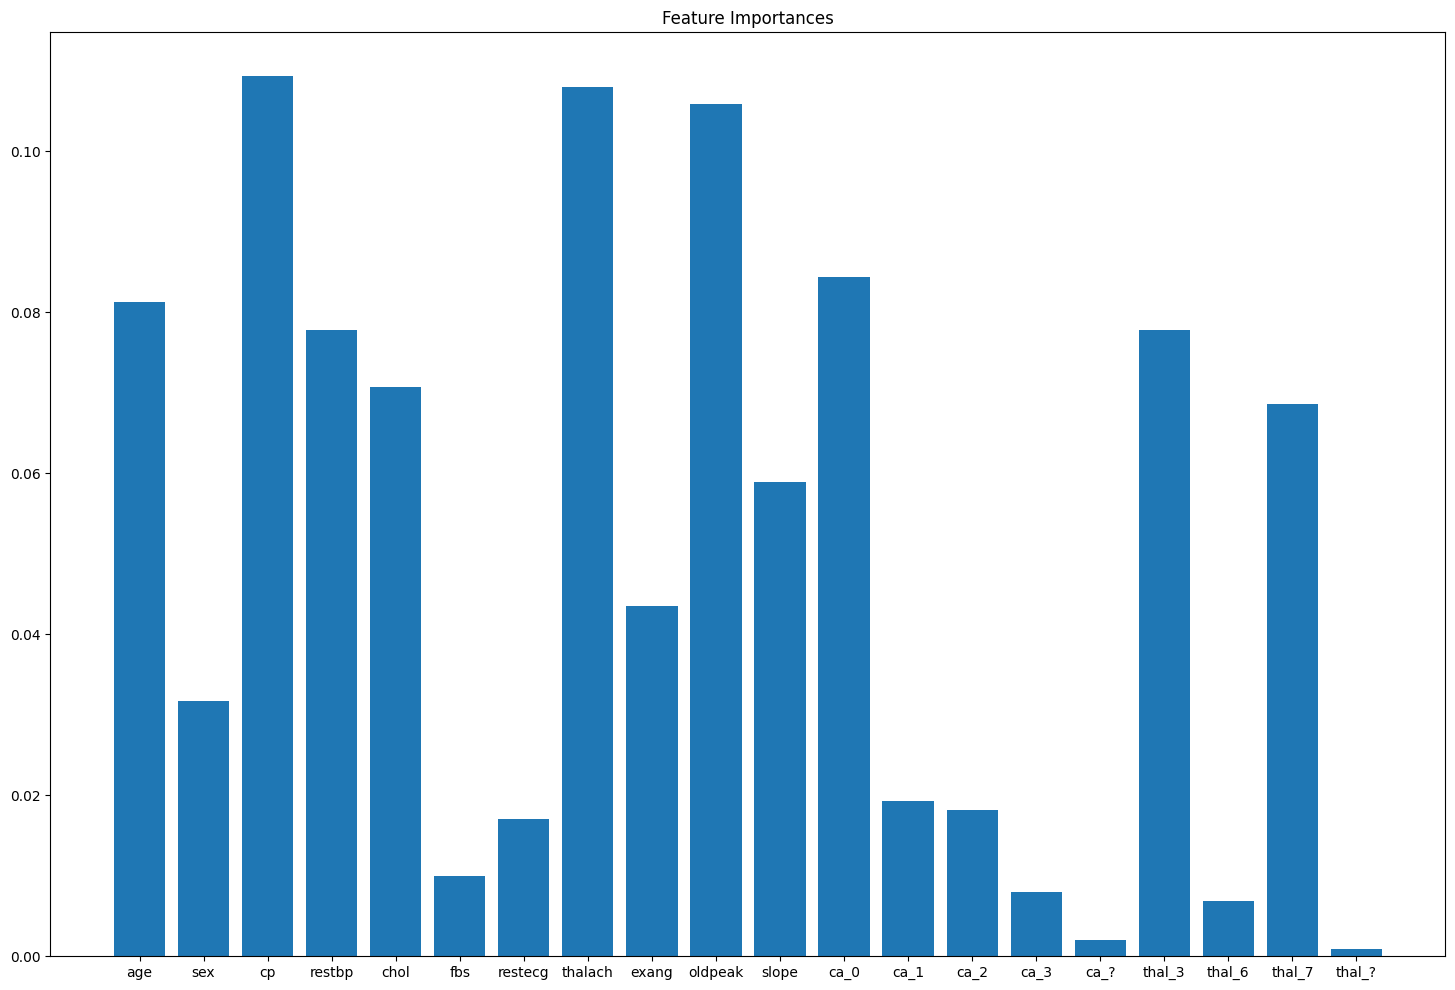

In [15]:
# Plot feature importances
plt.figure(figsize=(18, 12))
plt.bar(X.columns, feature_importances)
plt.title('Feature Importances')
plt.show()


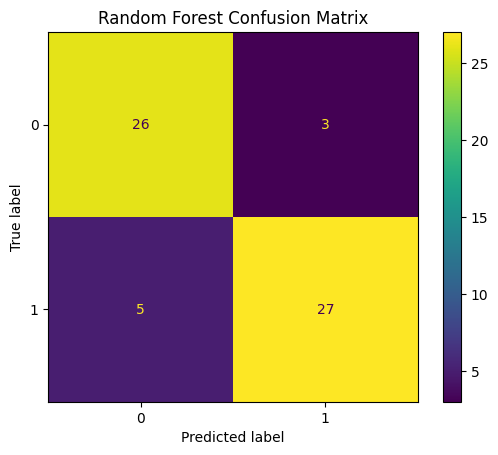

In [16]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

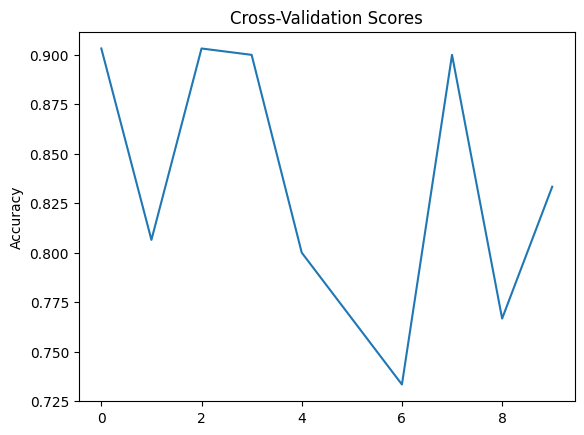

In [17]:
# 4. Cross-validation score
cv_scores = cross_val_score(rf_clf, X, Y, cv=10)
plt.plot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Print classification score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

print()

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8689

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [19]:
# 6. Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 20, None],        # Maximum depth of the trees
    'max_features': ['sqrt', 'log2'],      # Number of features to consider at each split
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [20]:
# Display the best parameters from the grid search
print("Optimal Parameters:")
optimal_params = grid_search.best_params_

# (a) Optimal number of trees
optimal_n_estimators = optimal_params['n_estimators']
print(f'Optimal Number of Trees: {optimal_n_estimators}')

# (b) Optimal maximum depth
optimal_max_depth = optimal_params['max_depth']
print(f'Optimal Maximum Depth: {optimal_max_depth}')

total_f = X.shape[1]
print(total_f)
# (c) Optimal number of features
optimal_max_features = optimal_params['max_features']
if optimal_max_features == 'sqrt':
    ans = np.floor(np.sqrt(total_f))
else:
    ans = np.floor(np.log2(total_f))
print(f"The optimal number of features : {ans}")

Optimal Parameters:
Optimal Number of Trees: 200
Optimal Maximum Depth: 5
20
The optimal number of features : 4.0
